In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
from sklearn.datasets.california_housing import fetch_california_housing
housing = fetch_california_housing()
#print (housing.DESCR)

In [25]:
print housing.data.shape
print housing.target.shape
print housing.data[0][6]


(20640L, 8L)
(20640L,)
37.88


In [4]:
from sklearn import tree

决策树

In [5]:
dtr = tree.DecisionTreeRegressor(max_depth=2)
dtr.fit(housing.data[:,[6,7]],housing.target)
#fit(X, y[, sample_weight, check_input, …])	Build a decision tree regressor from the training set (X, y).

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [6]:
dot_data = \
tree.export_graphviz(
    dtr,#刚重建的决策树
    out_file = None,
    feature_names = housing.feature_names[6:8],
    filled = True,
    impurity = False,
    rounded = True
)

sss

In [7]:
import pydotplus
from graphviz import Digraph

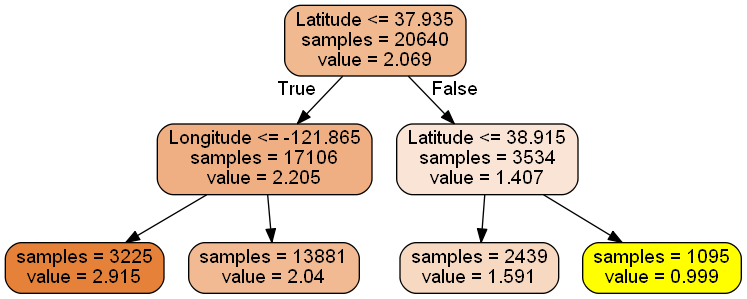

In [30]:
graph = pydotplus.graph_from_dot_data(dot_data)
graph.get_nodes()[7].set_fillcolor("yellow")
from IPython.display import Image
Image(graph.create_png())

In [31]:
graph.write_png("dtr_example.png")

True

In [34]:
from sklearn.model_selection import train_test_split 
#把样本集拆分成训练集和测试集
data_train,data_test,target_train,target_test = \
train_test_split(housing.data, housing.target, test_size = 0.1,random_state = 42)
dtr = tree.DecisionTreeRegressor(random_state = 42)
dtr.fit(data_train,target_train)

dtr.score(data_test,target_test)


0.637355881715626